In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

#### Removing Data

In [3]:
data = pd.read_csv('../../Database/data_science_job.csv')
data.head()

,enrollee_id,city,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,training_hours,target
0,8949,city_103,0.920,Male,Has relevent experience,no_enrollment,Graduate,STEM,20.0,NaN,NaN,36.0,1.0
1,29725,city_40,0.776,Male,No relevent experience,no_enrollment,Graduate,STEM,15.0,50-99,Pvt Ltd,47.0,0.0
2,11561,city_21,0.624,NaN,No relevent experience,Full time course,Graduate,STEM,5.0,NaN,NaN,83.0,0.0
3,33241,city_115,0.789,NaN,No relevent experience,NaN,Graduate,Business Degree,0.0,NaN,Pvt Ltd,52.0,1.0
4,666,city_162,0.767,Male,Has relevent experience,no_enrollment,Masters,STEM,20.0,50-99,Funded Startup,8.0,0.0


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19158 entries, 0 to 19157
Data columns (total 13 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   enrollee_id             19158 non-null  int64  
 1   city                    19158 non-null  object 
 2   city_development_index  18679 non-null  float64
 3   gender                  14650 non-null  object 
 4   relevent_experience     19158 non-null  object 
 5   enrolled_university     18772 non-null  object 
 6   education_level         18698 non-null  object 
 7   major_discipline        16345 non-null  object 
 8   experience              19093 non-null  float64
 9   company_size            13220 non-null  object 
 10  company_type            13018 non-null  object 
 11  training_hours          18392 non-null  float64
 12  target                  19158 non-null  float64
dtypes: float64(4), int64(1), object(8)
memory usage: 1.9+ MB


In [5]:
data.isnull().sum()

enrollee_id                  0
city                         0
city_development_index     479
gender                    4508
relevent_experience          0
enrolled_university        386
education_level            460
major_discipline          2813
experience                  65
company_size              5938
company_type              6140
training_hours             766
target                       0
dtype: int64

Percentage of Missing Values in each column

In [6]:
np.round(data.isnull().mean()*100, 2)

enrollee_id                0.00
city                       0.00
city_development_index     2.50
gender                    23.53
relevent_experience        0.00
enrolled_university        2.01
education_level            2.40
major_discipline          14.68
experience                 0.34
company_size              30.99
company_type              32.05
training_hours             4.00
target                     0.00
dtype: float64

Remove Rows where less than 5% data is missing

In [7]:
# MCAR = [var for var in data.columns if data[var].isnull().mean() < 0.05 and data[i].isnull().mean() > 0.00]

new_df = []
for i in data.columns:
    if data[i].isnull().mean() < 0.05 and data[i].isnull().mean() > 0.00:
        new_df.append(i)

new_df

['city_development_index',
 'enrolled_university',
 'education_level',
 'experience',
 'training_hours']

In [8]:
data[new_df].head()

,city_development_index,enrolled_university,education_level,experience,training_hours
0,0.920,no_enrollment,Graduate,20.0,36.0
1,0.776,no_enrollment,Graduate,15.0,47.0
2,0.624,Full time course,Graduate,5.0,83.0
3,0.789,NaN,Graduate,0.0,52.0
4,0.767,no_enrollment,Masters,20.0,8.0


Checking the amount of data left after removing rows

In [9]:
print("Approx:", np.round(len(data[new_df].dropna()) / len(data), 2)*100,"%", "data left")

new_data = data[new_df].dropna()

print("Original Data Shape", data.shape)
print("New Data Shape", new_data.shape)

Approx: 90.0 % data left
Original Data Shape (19158, 13)
New Data Shape (17182, 5)


This graph proving that the missing data is MCAR. (So performing CCA is safe)

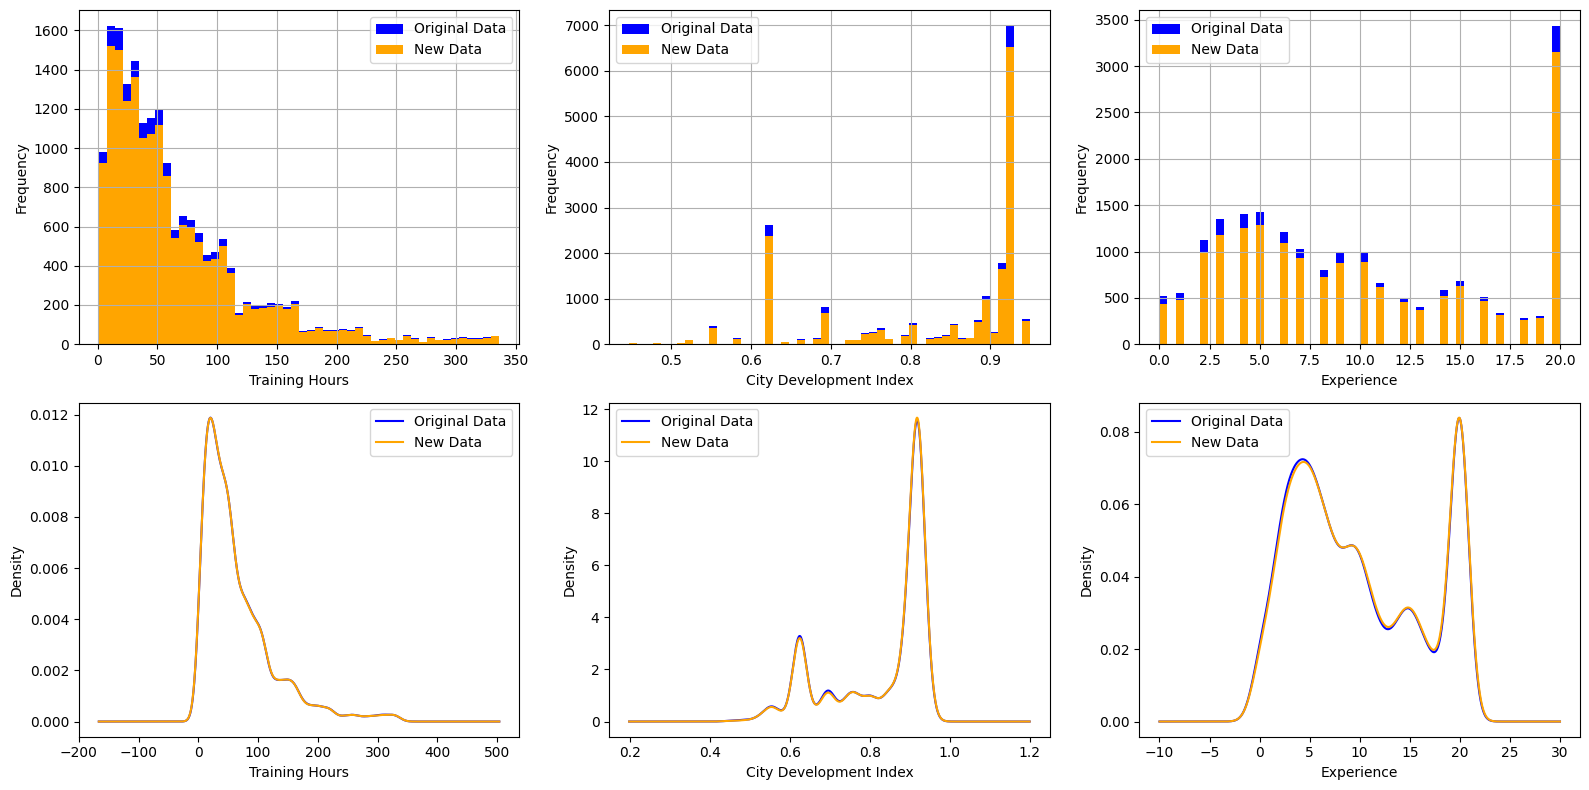

In [10]:
import matplotlib.pyplot as plt
from matplotlib.gridspec import GridSpec

# data after cca, the argument alpha makes the color transparent, so we can
# see the overlay of the 2 distributions

fig = plt.figure(figsize=(16, 8))
gs = GridSpec(2, 3)

# Training Hours (Histogram)
ax1 = fig.add_subplot(gs[0, 0])
data['training_hours'].hist(bins=50, ax=ax1, color='blue', label='Original Data')
new_data['training_hours'].hist(bins=50, ax=ax1, color='orange', label='New Data')
ax1.set_xlabel('Training Hours')
ax1.set_ylabel('Frequency')
ax1.legend()

# City Development Index (Histogram)
ax2 = fig.add_subplot(gs[0, 1])
data['city_development_index'].hist(bins=50, ax=ax2, color='blue', label='Original Data')
new_data['city_development_index'].hist(bins=50, ax=ax2, color='orange', label='New Data')
ax2.set_xlabel('City Development Index')
ax2.set_ylabel('Frequency')
ax2.legend()

# Experience (Histogram)
ax3 = fig.add_subplot(gs[0, 2])
data['experience'].hist(bins=50, ax=ax3, color='blue', label='Original Data')
new_data['experience'].hist(bins=50, ax=ax3, color='orange', label='New Data')
ax3.set_xlabel('Experience')
ax3.set_ylabel('Frequency')
ax3.legend()

# Training Hours (Density)
ax4 = fig.add_subplot(gs[1, 0])
data['training_hours'].plot.density(ax=ax4, color='blue', label='Original Data')
new_data['training_hours'].plot.density(ax=ax4, color='orange', label='New Data')
ax4.set_xlabel('Training Hours')
ax4.set_ylabel('Density')
ax4.legend()

# City Development Index (Density)
ax5 = fig.add_subplot(gs[1, 1])
data['city_development_index'].plot.density(ax=ax5, color='blue', label='Original Data')
new_data['city_development_index'].plot.density(ax=ax5, color='orange', label='New Data')
ax5.set_xlabel('City Development Index')
ax5.set_ylabel('Density')
ax5.legend()


# Experience (Density)
ax6 = fig.add_subplot(gs[1, 2])
data['experience'].plot.density(ax=ax6, color='blue', label='Original Data')
new_data['experience'].plot.density(ax=ax6, color='orange', label='New Data')
ax6.set_xlabel('Experience')
ax6.set_ylabel('Density')
ax6.legend()

plt.tight_layout()
plt.show()

before cca jo ratio h categorical column ka wohi ratio after cca bhi maintain rehna chahiye

In [12]:
data['education_level'].value_counts()

education_level
Graduate          11598
Masters            4361
High School        2017
Phd                 414
Primary School      308
Name: count, dtype: int64

In [13]:
temp = pd.concat([
    data['education_level'].value_counts() / len(data),
    new_data['education_level'].value_counts() / len(new_data),
], axis=1)
temp.columns = ['before cca', 'after cca']
temp

,before cca,after cca
education_level,,
Graduate,0.605387,0.619835
Masters,0.227633,0.234082
High School,0.105282,0.107380
Phd,0.021610,0.022116
Primary School,0.016077,0.016587


In [14]:
temp = pd.concat([
    data['enrolled_university'].value_counts() / len(data),
    new_data['enrolled_university'].value_counts() / len(new_data),
], axis=1)
temp.columns = ['before cca', 'after cca']
temp

,before cca,after cca
enrolled_university,,
no_enrollment,0.721213,0.735188
Full time course,0.196106,0.200733
Part time course,0.062533,0.064079
